In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('5_a.csv')

In [3]:
data

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
...,...,...
10095,1.0,0.665371
10096,1.0,0.607961
10097,1.0,0.777724
10098,1.0,0.846036


In [27]:
 list(data.iloc[:,1])


[0.6373866237658206,
 0.6351650448158641,
 0.7665855865120033,
 0.7245642294966452,
 0.8891988000338785,
 0.6016002164626768,
 0.6663225797608214,
 0.5670120690928357,
 0.6502302984736439,
 0.8293455462248929,
 0.587651767794799,
 0.8385220454950837,
 0.8258256222086358,
 0.6754981115497111,
 0.6674238909165087,
 0.5830382526004361,
 0.6941178982737743,
 0.6982278634850806,
 0.5143759250001354,
 0.511865539049447,
 0.5693376919131107,
 0.5664806516380112,
 0.6371473961924938,
 0.7554825689353779,
 0.6929698517176817,
 0.7661689825735853,
 0.5632779482742258,
 0.8372099556958508,
 0.5809158030642513,
 0.5567773954653294,
 0.8040786567352439,
 0.5840368820951208,
 0.668584594357464,
 0.7670676858626078,
 0.6091170153472177,
 0.5092846997811341,
 0.8700085019170322,
 0.8532220412575242,
 0.5487851940432609,
 0.6232852655014806,
 0.6936013518913329,
 0.7469587461219462,
 0.6500282441862083,
 0.7477184605849838,
 0.6886648112068445,
 0.685968045762201,
 0.5604167707383825,
 0.72839189782109

In [24]:
y_predicted = [0  if i<0.5 else 1 for i in list(data['proba']) ]

In [25]:
0 in y_predicted

False

In [81]:
# confusion matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def custom_metrics(data):
    y_actual = list(data.iloc[:,0])
    y_predicted = list(data.iloc[:,1])
    
    
    # lets binarize y_predicted with threshold 0.5.
    # means >=0.5 is 1 otherwise 0
    y_actual = list(map(int ,y_actual))
    y_predicted = [0 if i<0.5 else 1 for i in y_predicted]
    
    confusion_matrix = [
                        [0,0],
                        [0,0]
                    ]
#     print('actual y',y_actual)
#     print('predicted y',y_predicted)
    #let's calculate every part of confusion matrix
    # TrueNegative(TN), FalseNegative(FN), TruePositive(TP),FalsePositive(FP)
    tn,fn,tp,fp = 0,0,0,0
    for i in range(len(y_actual)):
        
        
        if y_actual[i]==0 and y_predicted[i] ==0:
            tn +=1
        elif y_actual[i]==0 and y_predicted[i] ==1:
            fp +=1
        elif y_actual[i]==1 and y_predicted[i] ==1:
            tp +=1
        elif y_actual[i]==1 and y_predicted[i]==0:
            fn +=1
    
    confusion_matrix[0][0] = tn
    confusion_matrix[0][1] = fp
    confusion_matrix[1][0] = fn
    confusion_matrix[1][1] = tp
    print(np.array(confusion_matrix))
    ##### we have computed confusion matrix ########
    
    ###############################################################################
    #############################*************#####################################
    ######## let's compute f1-score ################
    
    ### first find precision and recall
    ###############################################
    ### precision = tp/(tp+fp) ####################
    ### precision = TruePositive/ total predicted positive)###
    ###############################################
    ### recall    = tp/(tp+fn) ####################
    ### recall    = TruePositive/ total actual positive)######
    ###############################################
    precision = tp/(tp+fp)
    recall    = tp/(tp+fn)
    
    f1_score = 2*((precision * recall)/(precision+recall))
    print('f1-score',f1_score)
    ##############################**************###################################
    ###############################################################################
    
    # let's find accuracy score before AUC Score
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print('accuracy',accuracy)
    ###############################################################################
    ##################### AUC SCORE ###############################################
    
    ## step 1: find n-unique probabilities from predicted y
    # let's find n unique probabilities
    y_predicted = np.array(data.iloc[:,1]) # changing to numpy.array
    print('y_predicted',y_predicted)
    threshold   = np.unique(y_predicted)#finding unique values
    threshold.sort()# sort the probabilities in ascending order
    
    print('threshold',threshold)
    #for every probabilities in threshold
    fpr_values = []
    tpr_values = []
    for thresh in threshold:# make every probability as threshold
        
        # for every threshold value change the y_predicted
        # y = y_actual[:] #uncomment it to copy y_actual to y
        y_predicted = [0 if i<thresh else 1 for i in y_predicted]
        
        
        # find tpr and fpr for every threshold
        tpr = tp/(tp+fp)
        fpr = fp/(fp+tn)
        
        tpr_values.append(tpr)
        fpr_values.append(fpr)
        
    # change tpr_values and fpr_values to numpy array
    tpr_array = np.array(tpr_values)
    fpr_array = np.array(fpr_values)
    print('fpr:',fpr_array)
    print('tpr:',tpr_array)
    auc_score = np.trapz(tpr_array, fpr_array)
    plt.plot(tpr_array,fpr_array)
    plt.show()
    print('auc score:',auc_score)

[[    0   100]
 [    0 10000]]
f1-score 0.9950248756218906
accuracy 0.9900990099009901
y_predicted [0.63738662 0.63516504 0.76658559 ... 0.77772367 0.84603622 0.67950667]
threshold [0.50001859 0.50004734 0.50005801 ... 0.89982485 0.89982831 0.89996535]
fpr: [1. 1. 1. ... 1. 1. 1.]
tpr: [0.99009901 0.99009901 0.99009901 ... 0.99009901 0.99009901 0.99009901]


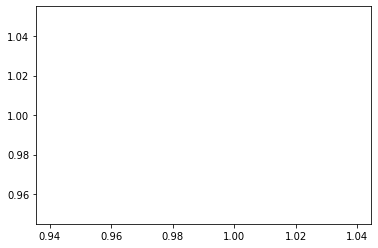

In [82]:
custom_metrics(data)

In [50]:
x = np.array([1,2,3,4,4,5,4,4,4,5,5,5,5,4,4,43,3,4,3443,45,6])

In [51]:
np.unique(x)

array([   1,    2,    3,    4,    5,    6,   43,   45, 3443])

In [55]:
1 == 1.0

True

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

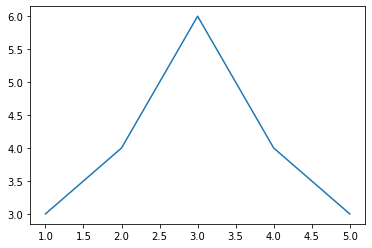

In [71]:
plt.plot(np.array([1,2,3,4,5]),np.array([3,4,6,4,3]))

In [72]:
5/2

2.5

In [79]:
np.trapz(np.array([3.4,3.6,2.5]),np.array([5.3,6.6,7.6]))

7.599999999999999

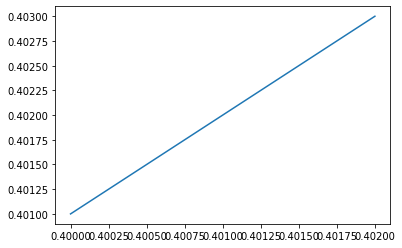

In [87]:
plt.plot(np.array([0.400,0.401,0.402]),np.array([0.401,0.402,0.403]))